In [1]:
x = 6
ss = 0.01

for i in range(2000):
    x = x-ss*(2*x)

In [2]:
x

1.6994274752726746e-17

In [3]:
"{0:.20f}".format(x)

'0.00000000000000001699'

In [4]:
import pandas as pd
import numpy as np

In [5]:
df = pd.read_csv('Housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [6]:
df = df[['price', 'area']]

In [7]:
df.head()

,price,area
0,13300000,7420
1,12250000,8960
2,12250000,9960
3,12215000,7500
4,11410000,7420


In [8]:
df1 = (df-df.mean())/df.std()

In [9]:
df1.head()

,price,area
0,4.562174,1.045766
1,4.000809,1.755397
2,4.000809,2.216196
3,3.982096,1.082630
4,3.551716,1.045766


In [11]:
X = np.array(df1['area'])
y = np.array(df1['price'])

In [14]:
def gradient(X, y, b1_current = 0, b0_current = 0, ss = 0.01, iters = 1000):
    n = float(len(y))
    
    gd_df = pd.DataFrame(columns = ['b0', 'b1', 'cost'])
    
    for i in range(iters):
        y_pred = b0_current + b1_current*X
        
        cost = sum([k**2 for k in (y-y_pred)])/n
        
        b1_slope = -(2/n)*sum((y-y_pred)*X)
        b0_slope = -(2/n)*sum(y-y_pred)
        
        b1_current = b1_current - ss*b1_slope
        b0_current = b0_current - ss*b0_slope
        
        gd_df.loc[i] = [b0_current, b1_current, cost]
    
    return gd_df

In [16]:
a = gradient(X, y)

In [17]:
a.tail()

,b0,b1,cost
995,2.630312e-16,0.535997,0.711399
996,2.560398e-16,0.535997,0.711399
997,2.557220e-16,0.535997,0.711399
998,2.522997e-16,0.535997,0.711399
999,2.544835e-16,0.535997,0.711399


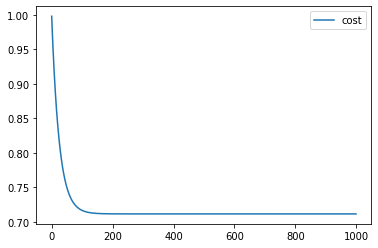

In [19]:
a.plot.line(y = ['cost'])